# Cluster Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load data

In [2]:
data = pd.read_csv("D:\\Users\\Minerva\\Programming\\Udemy\\The Data Science Course 2019 Complete Data Science Bootcamp\\38. Advanced Statistical Methods - K-Means Clustering\\Country clusters.csv")
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


## Plot

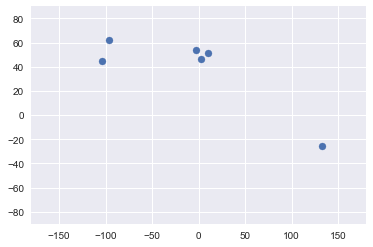

In [3]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select features

In [4]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [5]:
# Trying k=2
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Results

In [6]:
identifiedClusters = kmeans.fit_predict(x)
identifiedClusters

array([0, 0, 0, 0, 0, 1])

In [7]:
dataWithClusters = data.copy()
dataWithClusters['Cluster'] = identifiedClusters
dataWithClusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


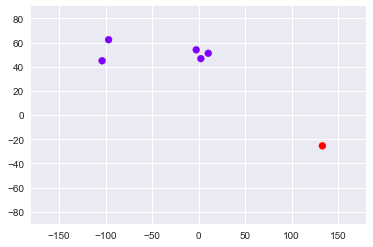

In [8]:
plt.scatter(dataWithClusters['Longitude'], dataWithClusters['Latitude'], c=dataWithClusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## K=3

In [9]:
kmeans = KMeans(3)
kmeans.fit(x)
identifiedClusters = kmeans.fit_predict(x)
identifiedClusters

array([0, 0, 1, 1, 1, 2])

In [10]:
dataWithClusters = data.copy()
dataWithClusters['Cluster'] = identifiedClusters
dataWithClusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


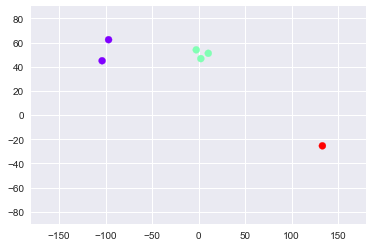

In [11]:
plt.scatter(dataWithClusters['Longitude'], dataWithClusters['Latitude'], c=dataWithClusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Adding Language feature

In [12]:
dataMapped = data.copy()
dataMapped['Language'] = dataMapped['Language'].map({'English':0,'French':1,'German':2})
dataMapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [13]:
x = dataMapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


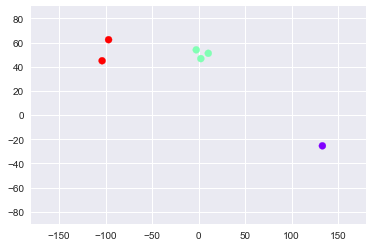

In [14]:
kmeans = KMeans(3)
kmeans.fit(x)
identifiedClusters = kmeans.fit_predict(x)
identifiedClusters
dataWithClusters = data.copy()
dataWithClusters['Cluster'] = identifiedClusters
dataWithClusters
plt.scatter(dataWithClusters['Longitude'], dataWithClusters['Latitude'], c=dataWithClusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## How to find correct K

In [15]:
kmeans.inertia_

290.10523333333333

In [16]:
# WCSS == Within-cluster Sum of Squares
#   aka distance between points in a cluster
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [17]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

## Elbow Method

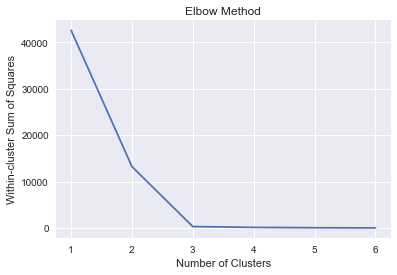

In [18]:
numClusters = range(1,7)
plt.plot(numClusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

In [19]:
# K=3 would be best choice

## Pros to KMeans

In [ ]:
# Easy to understand
# Quick to compute
# Easily available packages
# Easy to implement
# Always yields a result*

## Cons to KMeans and Remedies

In [20]:
# We need to pick K                     Elbow Method
# Sensitive to initialization           K-means++
# Sensitive to outliers                 Remove outliers
# Produces spherical solutions          ...
# Standardization                       ...

## Market Segmentation Example

In [21]:
data = pd.read_csv('D:\\Users\\Minerva\\Programming\\Udemy\\The Data Science Course 2019 Complete Data Science Bootcamp\\38. Advanced Statistical Methods - K-Means Clustering\\MarketSegExample.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


## Plot

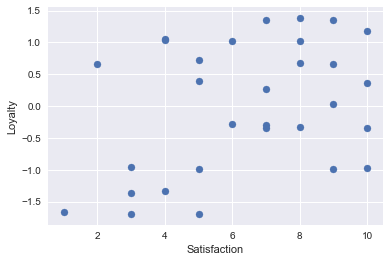

In [22]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Select Features

In [23]:
x = data.copy()

## Clustering

In [24]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Results

In [25]:
clusters = x.copy()
clusters['clusterPredictions'] = kmeans.fit_predict(x)

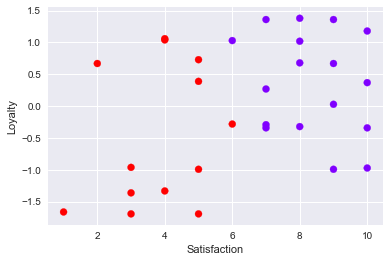

In [26]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'], c=clusters['clusterPredictions'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

# Standardization

## Standardize Variables

In [27]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Impliment Elbow Method to find K

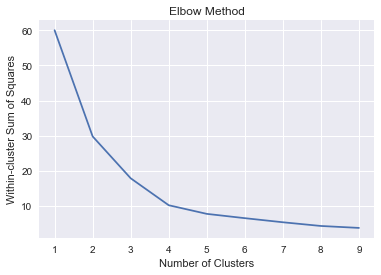

In [28]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

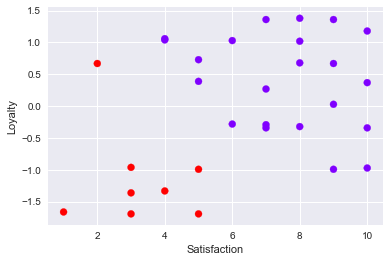

In [29]:
# Retry K=2 with standardized axes
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusterPredictions'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'], c=clusters_new['clusterPredictions'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

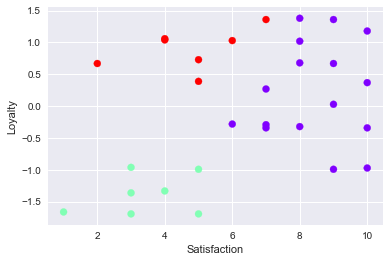

In [30]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusterPredictions'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'], c=clusters_new['clusterPredictions'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

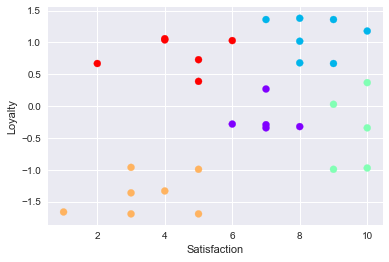

In [31]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusterPredictions'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'], c=clusters_new['clusterPredictions'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

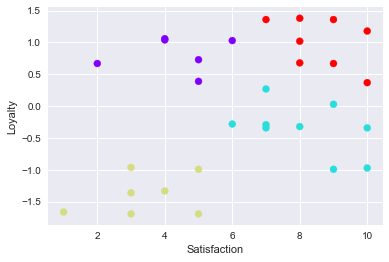

In [32]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['clusterPredictions'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'], c=clusters_new['clusterPredictions'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

K=4 seems best
We have:
red == supporters
blue == fans
purple == roamers
gray == alienated

Strategy would be to increase both Satisfaction and Loyalty through addressing known complaints, e.g. long queues, cleaner facilities, and through programs like rewards cards or discount vouchers.

## Other Types of Clustering

Hierarchical Clustering:

-Agglomerative - bottom-up

    Ex// Animal Kingdom Taxonomy Dendrogram
    
-Divisive - top-down

## Heatmaps

In [33]:
data = pd.read_csv('D:\\Users\\Minerva\\Programming\\Udemy\\The Data Science Course 2019 Complete Data Science Bootcamp\\39. Advanced Statistical Methods - Other Types of Clustering\\Country clusters standardized.csv', index_col='Country')
data.head()

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2


In [34]:
x_scaled = data.copy()
x_scaled = x_scaled.drop(['Language'], axis=1)
x_scaled.head()

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360


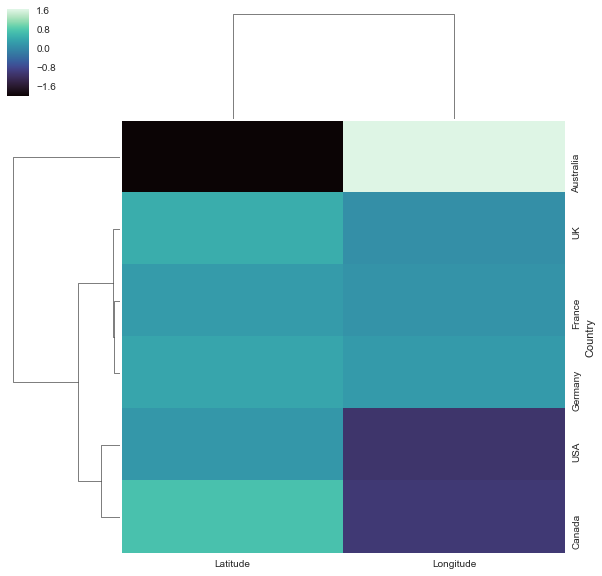

In [35]:
sns.clustermap(x_scaled, cmap='mako')